# Определение возроста человека по фотографий

## Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:<br>
Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы; <br>
Контролировать добросовестность кассиров при продаже алкоголя.<br>
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей <br> с указанием возраста.

## 1. Исследовательский анализ данных

In [1]:
# Импорт библиотек
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd


In [2]:
# Ипорт датасета с реальными возрастами
labels = pd.read_csv('/datasets/faces/labels.csv')

#Масштабирование изображений
train_datagen = ImageDataGenerator(rescale=1./255)

# Создание генератор изображения 
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [3]:
import matplotlib.pyplot as plt
from PIL import Image

# Вывод строк лабелов

labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
#Размер выборки
labels.shape

(7591, 2)

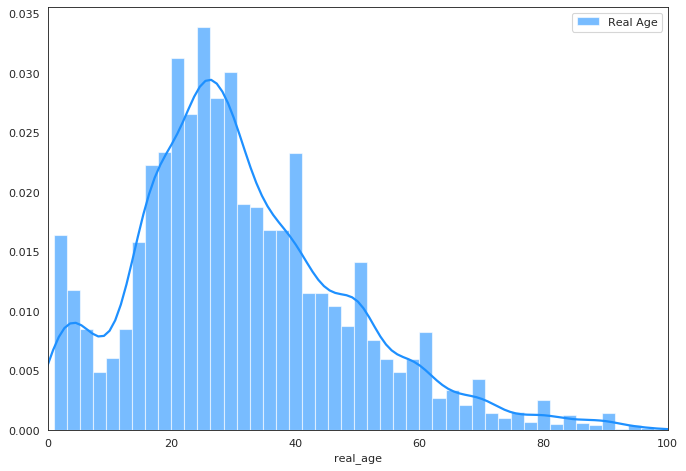

In [5]:
import seaborn as sns
sns.set_style("white")

#Построение распределения и гистограммы реального возроста 

x1 =  labels['real_age']


kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})


plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Real Age", **kwargs)

plt.xlim(0,100)
plt.legend();

### Вывод
 
Можно отметить, что есть два пика возроста. От 0 до 3 лет и от 20 до 30 лет. 

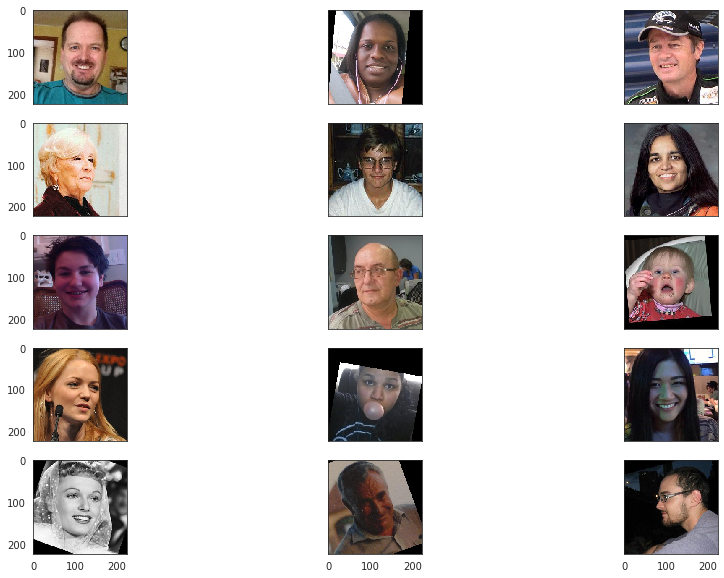

In [6]:
# Вывод нескольуо фотографий.
x,y  = train_gen_flow.next()

fig, axes = plt.subplots(ncols=3,nrows=5, sharex=True, sharey=True, figsize=(15,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(x[i], interpolation='none')

plt.show()    
        


In [7]:
# Размер изображений 
x.shape

(32, 224, 224, 3)

### Вывод

Выборка изображений. Длина  выборки 7591 , размер изображений (244 х 244) и три канала

<font color=green>Очень красиво получилось, спасибо:)</font>

# 2. Обучение модели

In [ ]:
```python

# < скопируйте код сюда >

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
 
 # Функция загрузки датасета тренировки
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow
 
#Функция загрузки датасета теста
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow

# Функция создания модели неиросета
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',
                        input_shape=input_shape,
                        include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
 
    return model

# Функция обучения модели
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

```

In [ ]:
""""
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20
2020-04-22 14:32:46.689730: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-04-22 14:32:47.024877: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 73s - loss: 202.9100 - mae: 10.8584 - val_loss: 1158.0676 - val_mae: 29.6162
Epoch 2/20
356/356 - 45s - loss: 143.2905 - mae: 9.1459 - val_loss: 343.5439 - val_mae: 13.9320
Epoch 3/20
356/356 - 45s - loss: 115.1994 - mae: 8.1771 - val_loss: 120.8794 - val_mae: 8.5000
Epoch 4/20
356/356 - 45s - loss: 95.3100 - mae: 7.4425 - val_loss: 142.2078 - val_mae: 8.8449
Epoch 5/20
356/356 - 45s - loss: 83.3194 - mae: 6.9653 - val_loss: 229.8723 - val_mae: 11.2971
Epoch 6/20
356/356 - 45s - loss: 67.0351 - mae: 6.3292 - val_loss: 122.1200 - val_mae: 8.3569
Epoch 7/20
356/356 - 45s - loss: 62.0812 - mae: 6.0220 - val_loss: 97.4344 - val_mae: 7.3585
Epoch 8/20
356/356 - 45s - loss: 48.6267 - mae: 5.3711 - val_loss: 125.3193 - val_mae: 8.4531
Epoch 9/20
356/356 - 44s - loss: 47.9166 - mae: 5.3314 - val_loss: 120.4990 - val_mae: 8.1781
Epoch 10/20
356/356 - 44s - loss: 37.5858 - mae: 4.6757 - val_loss: 85.4370 - val_mae: 6.9271
Epoch 11/20
356/356 - 45s - loss: 32.3560 - mae: 4.3859 - val_loss: 114.1883 - val_mae: 8.0701
Epoch 12/20
356/356 - 45s - loss: 28.4287 - mae: 4.1400 - val_loss: 86.1264 - val_mae: 6.8947
Epoch 13/20
356/356 - 44s - loss: 26.4338 - mae: 3.9715 - val_loss: 92.2561 - val_mae: 7.1356
Epoch 14/20
356/356 - 45s - loss: 23.4872 - mae: 3.7602 - val_loss: 85.9360 - val_mae: 7.1003
Epoch 15/20
356/356 - 44s - loss: 21.5440 - mae: 3.5722 - val_loss: 103.2133 - val_mae: 7.4958
Epoch 16/20
356/356 - 45s - loss: 23.6846 - mae: 3.7519 - val_loss: 89.2574 - val_mae: 7.2988
Epoch 17/20
356/356 - 45s - loss: 20.4215 - mae: 3.5101 - val_loss: 102.2900 - val_mae: 7.4437
Epoch 18/20
356/356 - 45s - loss: 18.4325 - mae: 3.3450 - val_loss: 81.4530 - val_mae: 6.6914
Epoch 19/20
356/356 - 45s - loss: 23.1395 - mae: 3.6645 - val_loss: 94.4285 - val_mae: 7.2632
Epoch 20/20
356/356 - 44s - loss: 21.4617 - mae: 3.5457 - val_loss: 85.3429 - val_mae: 6.9150

""""""""

# 3. Анализ обученной модели

### Вывод

Найлучше результат получилось с архитектурой ResNet50, и с одним нейроном на выходе, функция активаций relu. После 20 эпох обучения значение средной абсолютной ошибки на валидационой выборки составляет 6.9, что меньше на 1.1 чем требование.  Тем не менеедиапазон определения большой длятого чтобы определить совершенолетный ли покупетель при покупки алкоголя, но вполне подходит для того чтобы определить возрастной группы, анализировать покупки и предлагать товары, которые могут заинтересовать покупателей.